In [313]:
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [304]:
model = keras.models.load_model("tf_model2.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       1

In [346]:
def visualize_data(train_ds):
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(train_ds.class_names[labels[i]])
            plt.axis("off")


def idx_to_class(dataset, idx):
    """
    This function takes the prediction (which is an index)
    and finds the corresponding class name from the 
    dataset.class_to_idx dictionary
    """

    class_dict = dataset.class_to_idx
    key_lst = list(class_dict.keys())
    val_lst = list(class_dict.values())
    class_name = val_lst.index(idx)
    return key_lst[class_name]


def generate_predictions(dataset):
    predictions = []
    true_labels = []
    for img, lbl in dataset:
        pred = model.predict(img)
        pred = [np.argmax(i) for i in pred]
        label = list(lbl.numpy())
        predictions.extend(pred)
        true_labels.extend(label)
    
    return predictions, true_labels


def build_confusion_matrix(true_labels, predictions, dataset):
    confusion_matrix = tf.math.confusion_matrix(true_labels, predictions).numpy()
    class_names = dataset.class_names
    fig, ax = plt.subplots(figsize=(10,7))
    tick_marks = np.arange(len(class_names)) + 0.5
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlOrBr" ,fmt='g')
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names, rotation=45)
    ax.xaxis.set_label_position("top")
    #plt.tight_layout()
    plt.title('Brain Tumor Classification CNN: Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [306]:
image_height = 128
image_width = 128
data_dir = '/Users/Jonathan/Desktop/Errythang/MSDAS/Bioinformatics/project/Brain-Tumor-Classification/Testing'

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(image_height, image_width))

Found 1311 files belonging to 4 classes.


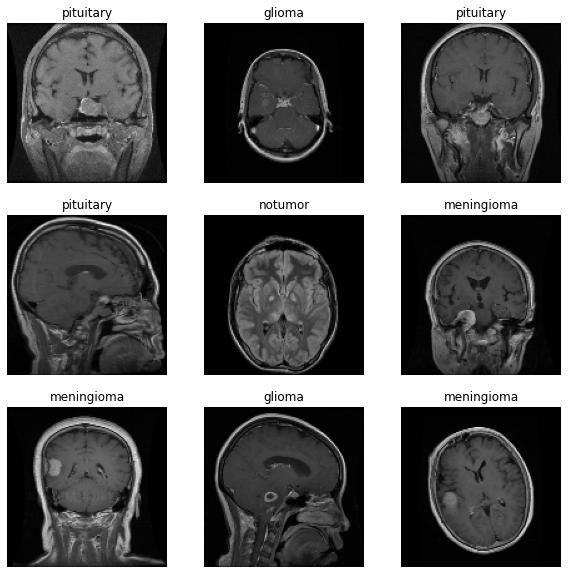

In [308]:
visualize_data(test_ds)

In [309]:
model.evaluate(test_ds, batch_size=32)

2023-05-26 10:00:24.601269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 4s 81ms/step - loss: 4.5853 - accuracy: 0.9786


[4.585262775421143, 0.9786422848701477]

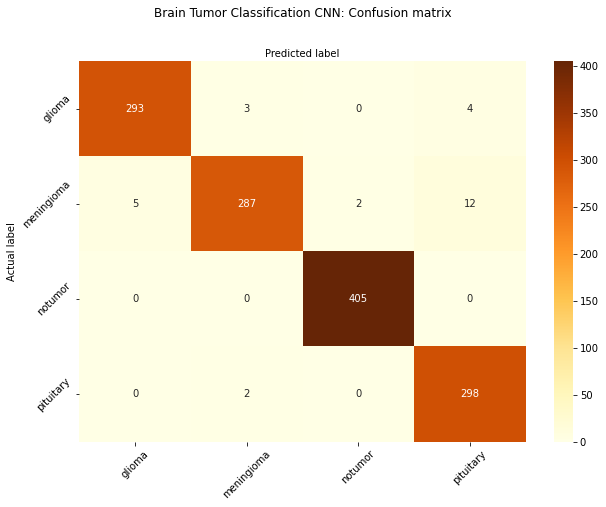

In [347]:
predictions, true_labels = generate_predictions(test_ds)
build_confusion_matrix(true_labels, predictions, test_ds)

In [316]:
print(classification_report(true_labels, predictions, target_names=test_ds.class_names))

              precision    recall  f1-score   support

      glioma       0.98      0.98      0.98       300
  meningioma       0.98      0.94      0.96       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [222]:
preds

array([[7.4305217e-04, 3.6746690e-03, 9.9416637e-01, 1.4159067e-03],
       [2.9759941e-04, 1.2924429e-03, 7.8633818e-04, 9.9762362e-01],
       [9.9341822e-01, 1.3986551e-03, 2.6266959e-03, 2.5565499e-03],
       ...,
       [6.8718480e-04, 1.9242177e-03, 9.9664319e-01, 7.4537308e-04],
       [1.5438728e-03, 5.7697902e-03, 9.8989093e-01, 2.7954243e-03],
       [3.4937618e-04, 1.8586417e-03, 9.9721944e-01, 5.7250878e-04]],
      dtype=float32)